In [123]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
from learn.utils import FileHandler, get_file_suffix_map

In [137]:
epsilon_df = pd.read_csv('../experiments/epsilon_greedy_run_0/learning_out/intersection_0/action_hist.csv')
thompson_df = pd.read_csv('../experiments/thompson_run_0/learning_out/intersection_0/action_hist.csv')
ucb_df = pd.read_csv('../experiments/upper_confidence_bound_run_0/learning_out/intersection_0/action_hist.csv')

In [138]:
epsilon_target = epsilon_df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]
thompson_target = thompson_df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]
ucb_target = ucb_df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]

In [139]:
def moving_average_col_generation(target, length):
    target['roll_lane_length'] = target['avg_lane_queueing_length'].rolling(length).mean()
    target['roll_waiting_time'] = target['avg_lane_queueing_time'].rolling(length).mean()
    return target

In [179]:
import plotly.graph_objects as go
def plot_df(df, title=None):
    fig = go.Figure()
    fig.update_layout(title_text=title, title_x=0.5)
    fig.add_trace(go.Scatter(x=df.index, y=df['avg_lane_queueing_length'], name='queue_length', opacity=0.1))
    fig.add_trace(go.Scatter(x=df.index, y=df['avg_lane_queueing_time'], name = 'queue_time', opacity=0.1))
    fig.add_trace(go.Scatter(x=df.index, y=df['roll_lane_length'], name='moving_avg_queue_length'))
    fig.add_trace(go.Scatter(x=df.index, y=df['roll_waiting_time'], name = 'moving_avg_queue_time'))
    fig.show()

In [195]:
def vis(raw_df, moving_avg_length, title=None):
    df = moving_average_col_generation(raw_df, moving_avg_length)
    plot_df(df, title)
    percentage_length = float(df['roll_lane_length'][moving_avg_length] - df['roll_lane_length'][len(df)-1]) / df['roll_lane_length'][moving_avg_length]
    percentage_time = float(df['roll_waiting_time'][moving_avg_length] - df['roll_waiting_time'][len(df)-1]) / df['roll_waiting_time'][moving_avg_length]
    print(f'Waiting lane length reduced: {percentage_length * 100}%')
    print(f'Waiting time reduced: {percentage_time * 100}%')

In [196]:
vis(thompson_target, 100, 'Thompson Sampling Result (100 Moving Average)')

Waiting lane length reduced: 37.69854586771736%
Waiting time reduced: 32.75160399788789%


In [191]:
vis(epsilon_target, 100, 'Epsilon Greedy Result (100 Moving Average)')

This approach is not robust and stable becase each choice of the idividual light might affect each other

<AxesSubplot: >

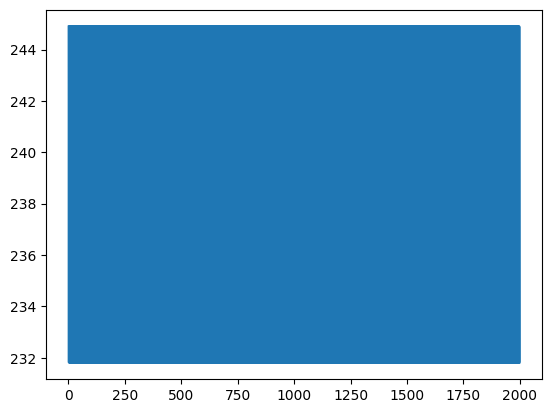

In [144]:
ucb_target['avg_lane_queueing_length'].plot()
# ucb_target['roll_waiting_time'].plot()